# Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-15 14:27:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   317MB/s    in 0.3s    

2021-08-15 14:27:17 (317 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
ls! pizza_steak/train/steak

ls: cannot access '!': No such file or directory
pizza_steak/train/steak:
1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg   443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  16877

In [3]:
import os
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

# Visualize images
get class names programmatically

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [5]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup target dir
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (471, 512, 3)


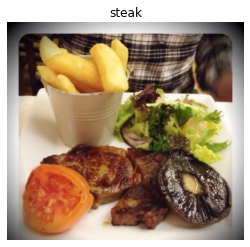

In [6]:
# view random image
img= view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [7]:



img 

array([[[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 1,  1,  3],
        [ 0,  0,  2],
        [ 0,  0,  2],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       ...,

       [[49, 49, 51],
        [50, 50, 52],
        [52, 52, 54],
        ...,
        [52, 52, 54],
        [50, 50, 52],
        [49, 49, 51]],

       [[48, 48, 50],
        [49, 49, 51],
        [51, 51, 53],
        ...,
        [51, 51, 53],
        [49, 49, 51],
        [47, 47, 49]],

       [[48, 48, 50],
        [49, 49, 51],
        [51, 51, 53],
        ...,
        [51, 51, 53],
        [48, 48, 50],
        [47, 47, 49]]], dtype=uint8)

In [8]:
img/255

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.00392157, 0.00392157, 0.01176471],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.19215686, 0.19215686, 0.2       ],
        [0.19607843, 0.19607843, 0.20392157],
        [0.20392157, 0

# Feauture Scaling

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to data directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#import data drom directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Build a CNN model

In [10]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 41s 202ms/step - loss: 0.5723 - accuracy: 0.6973 - val_loss: 0.4555 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4255 - accuracy: 0.8173 - val_loss: 0.3635 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3956 - accuracy: 0.8327 - val_loss: 0.3592 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3611 - accuracy: 0.8460 - val_loss: 0.3049 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3113 - accuracy: 0.8867 - val_loss: 0.3145 - val_accuracy: 0.8560


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# 1.Become one with the data

Image shape: (512, 382, 3)
Image shape: (512, 384, 3)


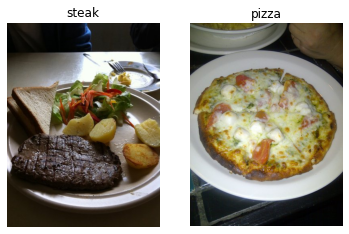

In [12]:
plt.figure
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/", "pizza")


# 2.Preprocess the data




In [13]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [14]:
# create train and test data generators and rescale data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# get first two images
images, labels = train_data.next()
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

# 3.Create CNN Model

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [18]:
model_simple = Sequential([
  Conv2D(filters=10, #num of sliding windows 
         kernel_size=3, #size of sliding window
         strides=1, #size of step the sliding window takkes accross input
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")    
])

In [19]:
model_simple.compile(loss="binary_crossentropy",
                     optimizer=Adam(),
                     metrics=["accuracy"])

# 4.Fit the model

In [20]:
history_simple = model_simple.fit(train_data, 
                                  epochs=5, 
                                  steps_per_epoch=len(train_data), 
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 1.4049 - accuracy: 0.6447 - val_loss: 0.5041 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4315 - accuracy: 0.8100 - val_loss: 0.3735 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3089 - accuracy: 0.8800 - val_loss: 0.3630 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.2031 - accuracy: 0.9407 - val_loss: 0.3607 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1124 - accuracy: 0.9760 - val_loss: 0.4129 - val_accuracy: 0.8180


# 5.Evaluate Model

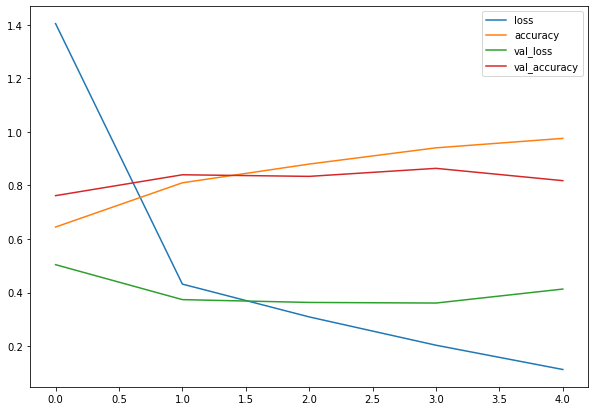

In [21]:
import pandas as pd
pd.DataFrame(history_simple.history).plot(figsize=(10, 7));

In [22]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

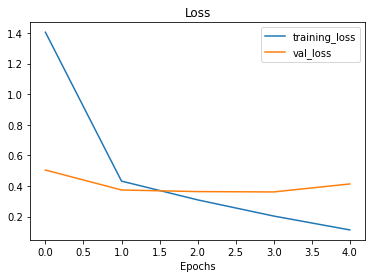

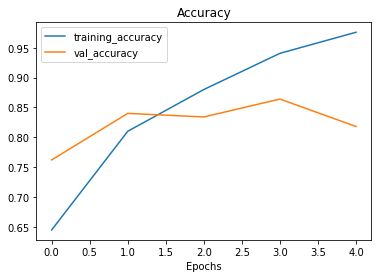

In [23]:
plot_loss_curves(history_simple)

# 6.Adjust model parameters
Fitting a machine learning model comes in 3 steps:

*   Create a basline.
*  Beat the baseline by overfitting a larger model.
* Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

    Increase the number of convolutional layers.
    Increase the number of convolutional filters.
    Add another dense layer to the output of our flattened layer.


In [24]:
model_2 = Sequential([
 Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
 MaxPool2D(pool_size=2), #reduce num of feautures by 2
 Conv2D(10, 3, activation="relu"),
 MaxPool2D(),
 Conv2D(10, 3 , activation="relu"),
 MaxPool2D(),
 Flatten(),
 Dense(1, activation="sigmoid")
])

In [25]:
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
                )

In [26]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6305 - accuracy: 0.6087 - val_loss: 0.4641 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4397 - accuracy: 0.7987 - val_loss: 0.3435 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3972 - accuracy: 0.8260 - val_loss: 0.3336 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3734 - accuracy: 0.8393 - val_loss: 0.3150 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3498 - accuracy: 0.8420 - val_loss: 0.3282 - val_accuracy: 0.8600


In [27]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

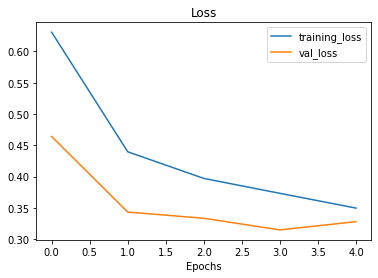

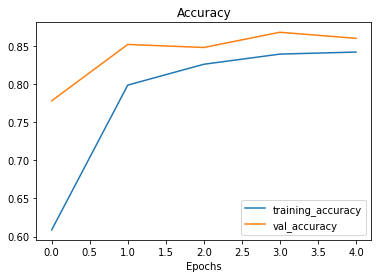

In [28]:
plot_loss_curves(history_2)

In [29]:
# create imagedatagenerator training instance with data augmentation
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=20, # rotate the image slightly between 0 and 20 degrees 
                                       shear_range=0.2, # shear the image
                                       zoom_range=0.2, # zoom into the image
                                       width_shift_range=0.2, # shift the image width ways
                                       height_shift_range=0.2, # shift the image height ways
                                       horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable

In [30]:
print("Augmented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       shuffle=True)

print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented Data
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [31]:
# get sample batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_aug.next()

(-0.5, 223.5, 223.5, -0.5)

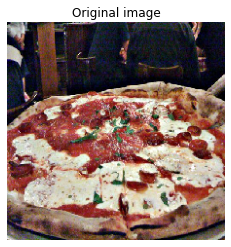

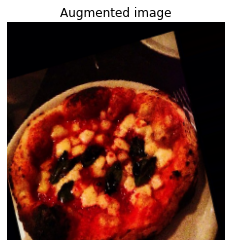

In [32]:
import random
random_number = random.randint(0, 32) #our batch size is 32
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [33]:
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6391 - accuracy: 0.6253 - val_loss: 0.5033 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5364 - accuracy: 0.7407 - val_loss: 0.4300 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4994 - accuracy: 0.7500 - val_loss: 0.3624 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4894 - accuracy: 0.7653 - val_loss: 0.3818 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4608 - accuracy: 0.7987 - val_loss: 0.3393 - val_accuracy: 0.8660


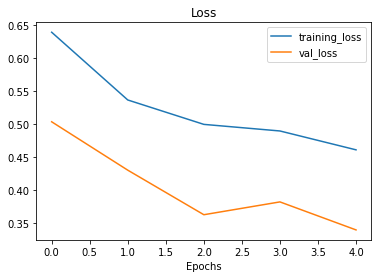

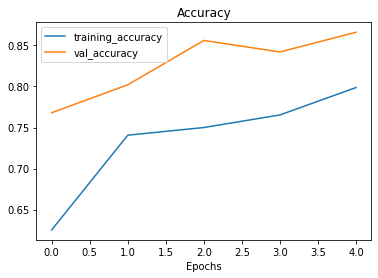

In [34]:
# check the training curves
plot_loss_curves(history_3)

# 7.Make preiction 

In [35]:
print(class_names)

['pizza' 'steak']


--2021-08-15 14:32:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-15 14:32:28 (44.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



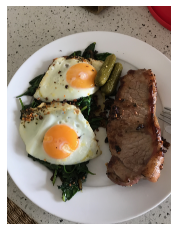

In [36]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [37]:
steak.shape

(4032, 3024, 3)

In [38]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  #decode into tensor
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #rescale img
  img = img/255.
  return img

In [39]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [40]:
model_3.predict(steak)

ValueError: ignored

In [41]:
steak = tf.expand_dims(steak, axis=0)

In [44]:
pred = model_3.predict(steak)

In [46]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [47]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

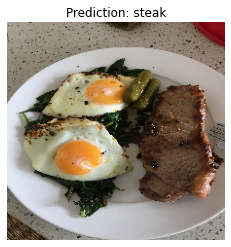

In [48]:
pred_and_plot(model_3, "03-steak.jpeg")

--2021-08-15 14:46:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-08-15 14:46:11 (67.8 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



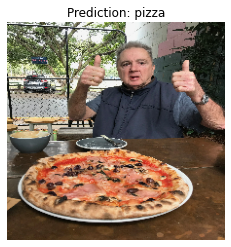

In [50]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)